In [1]:
import tensorflow as tf
tf.__version__

mnist = tf.keras.datasets.mnist #images of hand-written digits, each a 28x28 array
(x_train, y_train), (x_test, y_test) = mnist.load_data() #x is the images, y is what number is should be (answer key)
#print(x_train[0])

x_train = tf.keras.utils.normalize(x_train, axis=1) #scales the values in the tensor (n-dimensional array) to be values between 0-1, which are easier to work with for neural networks
x_test = tf.keras.utils.normalize(x_test, axis=1)

#model architect
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #first layer (input layer)
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #first hidden layer: 128neurons in the layer, activation is the stepup/sigmoid function (what will make the neuron fire)-use relu as default
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #second hidden layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #output layer: 10 is # of classificatoins (digits 0-9)

#training of model
#loss-degree of error, what it got wrong
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#time to train
model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2564 - accuracy: 0.9247
Epoch 2/3
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1086 - accuracy: 0.9670
Epoch 3/3
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0739 - accuracy: 0.9772


In [2]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.0926 - accuracy: 0.9714
0.09255189003143459 0.9714


In [3]:
#optional save a model
#model.save('custommodel')
#new_model = tf.keras.models.load_model('custommodel') #load model in the future
#predictions = new_model.predict([x_test]) #accepts a LIST - x_test in this example
#print(predictions)

#import numpy as np
#print(np.argmax(predictions[0]))

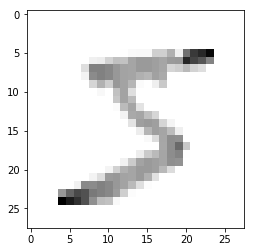

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show() #looking at just ONE of the many images


In [13]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = '/Users/benjamin.jones/Desktop/Wild'
wild_dir = os.path.join(base_dir, 'wild')

validation_image_generator = ImageDataGenerator(
    rescale=1./255)
wild_data_gen = validation_image_generator.flow_from_directory(batch_size=32,
                                                           directory=wild_dir,
                                                           shuffle=False,
                                                           target_size=(28, 28),
                                                           class_mode='input')
wild_output = model.predict_generator(wild_data_gen,
                        #steps=None, #if unspecified, will use the len(generator) as a number of steps.
                        callbacks=None,
                        max_queue_size=10,
                        workers=1,
                        use_multiprocessing=False,
                        verbose=0)

Found 3 images belonging to 1 classes.


InvalidArgumentError:  Matrix size-incompatible: In[0]: [3,2352], In[1]: [784,128]
	 [[node sequential/dense/Relu (defined at <ipython-input-13-82583bc07eda>:20) ]] [Op:__inference_distributed_function_18807]

Function call stack:
distributed_function


In [9]:
wild_dir

'/Users/benjamin.jones/Desktop/Wild/wildy'